In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv', index_col = [0],  header=[0, 1])

In [4]:
nonzero_ind = np.where(np.sum(wt_conn, axis = 1) > 0)[0]
wt_conn_nonzero = wt_conn.iloc[nonzero_ind]
wt_conn_nonzero_log = np.log(wt_conn_nonzero)
wt_conn_nonzero_log.iloc[np.where(np.isinf(wt_conn_nonzero_log))] = -6

/Users/samsonkoelle/anaconda3/envs/allen_010719_5/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [6]:
xticknames = wt_conn.columns.get_level_values('second')
major_structures = ['CB',
 'CTXsp',
 'HPF',
 'HY',
 'Isocortex',
 'MB',
 'MY',
 'OLF',
 'P',
 'PAL',
 'STR',
 'TH']

In [1]:
major_ontoloogy_summary = np.load('/Users/samsonkoelle/ontological_order_summary_majors_names.npy')

NameError: name 'np' is not defined

In [8]:
cs_col_ipsi = sns.color_palette("Spectral", 12)
cs_col_contra = sns.color_palette("Spectral", 12)



alphad_ipsi_majors = np.hstack([np.asarray(cs_col_contra), np.expand_dims(np.ones(12),1)])
alphad_contra_majors = np.hstack([np.asarray(cs_col_contra), .02*np.expand_dims(np.ones(12),1)])

cs_col_ipsi = alphad_ipsi_majors
cs_col_contra = alphad_contra_majors

cs_col_ipsi_dict = {}
cs_col_contra_dict = {}
for i in range(12):
    cs_col_ipsi_dict[major_structures[i]] = cs_col_ipsi[i]
    cs_col_contra_dict[major_structures[i]] = cs_col_contra[i]

ccol = np.zeros((577,4), dtype  =float)

for i in range(291):
    ccol[i,:] = np.asarray(cs_col_ipsi_dict[major_ontoloogy_summary[i]])
    
for i in range(286):
    ccol[i+ 291] = np.asarray(cs_col_contra_dict[major_ontoloogy_summary[:286][i]])
    

In [9]:
major_ontoloogy = np.load('/Users/samsonkoelle/ontological_order_leaves_majors_names.npy')
major_ontoloogy_nonzero = np.asarray(major_ontoloogy)[nonzero_ind]

In [11]:
crow = np.zeros((121,4), dtype  =float)

for i in range(121):
    crow[i,:] = np.asarray(cs_col_ipsi_dict[major_ontoloogy_nonzero[i]])
    


In [12]:
import matplotlib as mpl

In [13]:
import matplotlib.patches as mpatches
import seaborn as sns

reo = [4,7,2,1,10,9,11,3,5,8,6,0]
handles = [mpatches.Patch(color =  cs_col_ipsi_dict[major_structures[i]], label = major_structures[i]) for i in reo]

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


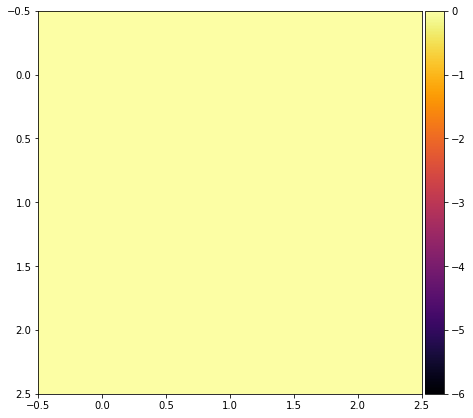

In [15]:


m1 = np.random.rand(3, 3)
m2 = np.arange(0, 3*3, 1).reshape((3, 3))

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(m1, interpolation='None',cmap = mpl.cm.inferno, vmin = -6, vmax = 0)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
#im1.clim(-6,0)

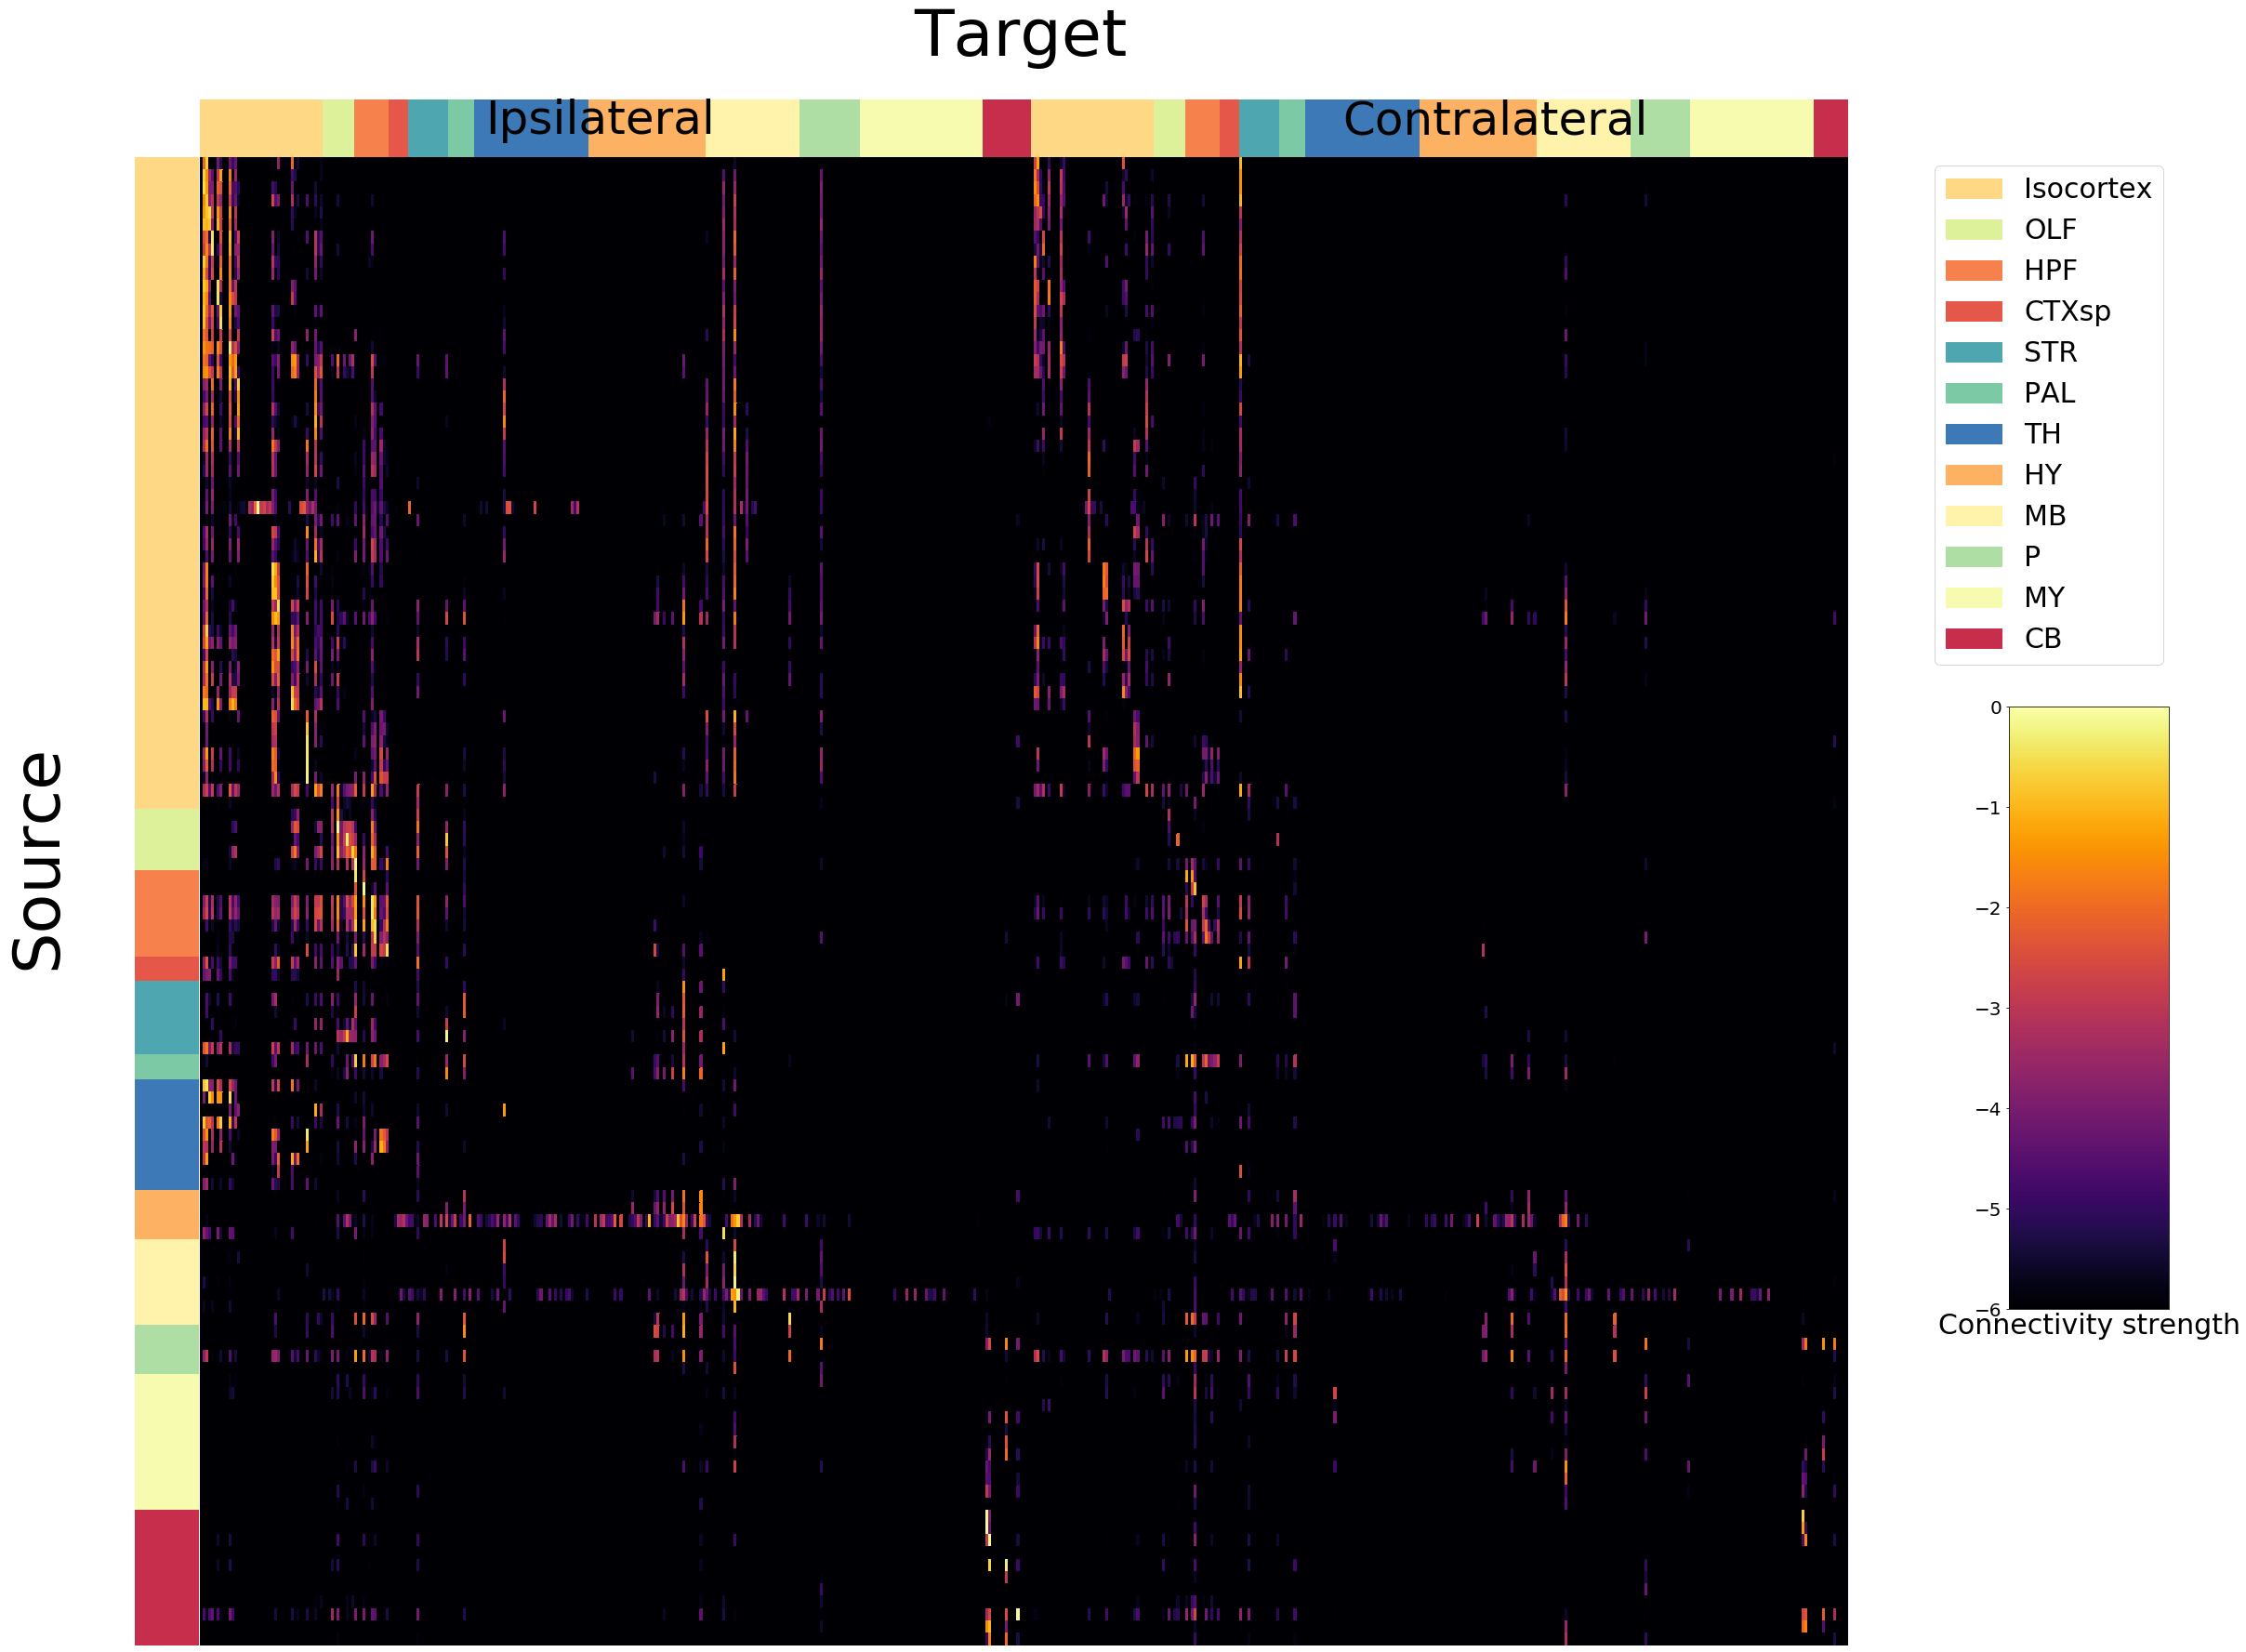

In [47]:
#fig, axes = plt.subplots(2,1,figsize=(5, 3))
#outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
#sns.clustermap(iris)
#cbar_ax = plt.gca()
#sns.clustermap(data, cbar_ax=cbar_ax)
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (80,30),
                   cmap = mpl.cm.inferno,
                    )

#xticklabels = cm.ax_heatmap.get_xticklabels()
#cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
cm.ax_heatmap.tick_params(left=False, bottom=False, right = False, top = False)
cm.ax_heatmap.set_xticklabels([])
cm.ax_heatmap.set_yticklabels([])

# yticklabels = cm.ax_heatmap.get_yticklabels()
# cm.ax_heatmap.set_yticklabels(yticklabels, visible = True, fontsize = 5)

cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.cax.set_visible(False)
cm.gs.update(left=0.05, right=0.45)
cm.ax_heatmap.set_xlabel('')
cm.ax_heatmap.set_ylabel('')
cm.ax_heatmap.tick_params(left=False, bottom=False)

gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
ax2 = cm.fig.add_axes([.48,.2,.03,.3], gs2[0])
cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.2,0.65),handles = handles, frameon=True, fontsize = 30)
#cm.ax_heatmap.text(2.,2.,'Ipsilateral', fontsize = 55)
cm.ax_col_colors.text(100.,.6, 'Ipsilateral', fontsize = 50)
cm.ax_col_colors.text(400.,.6, 'Contralateral', fontsize = 50)
#cm.ax_col_colors.text(291.,.6, '|', fontsize = 50)
cm.ax_col_colors.text(250.,-.75, 'Target', fontsize = 70)
cm.ax_row_colors.text(-2.,65., 'Source', fontsize = 70, rotation = 90)

cbar = fig.colorbar(im1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Connectivity strength', rotation=0)
cbar.ax.set_xlabel('Connectivity strength', rotation=0, fontsize = 30)
cbar.ax.yaxis.set_ticks_position('left')

plt.close(2)


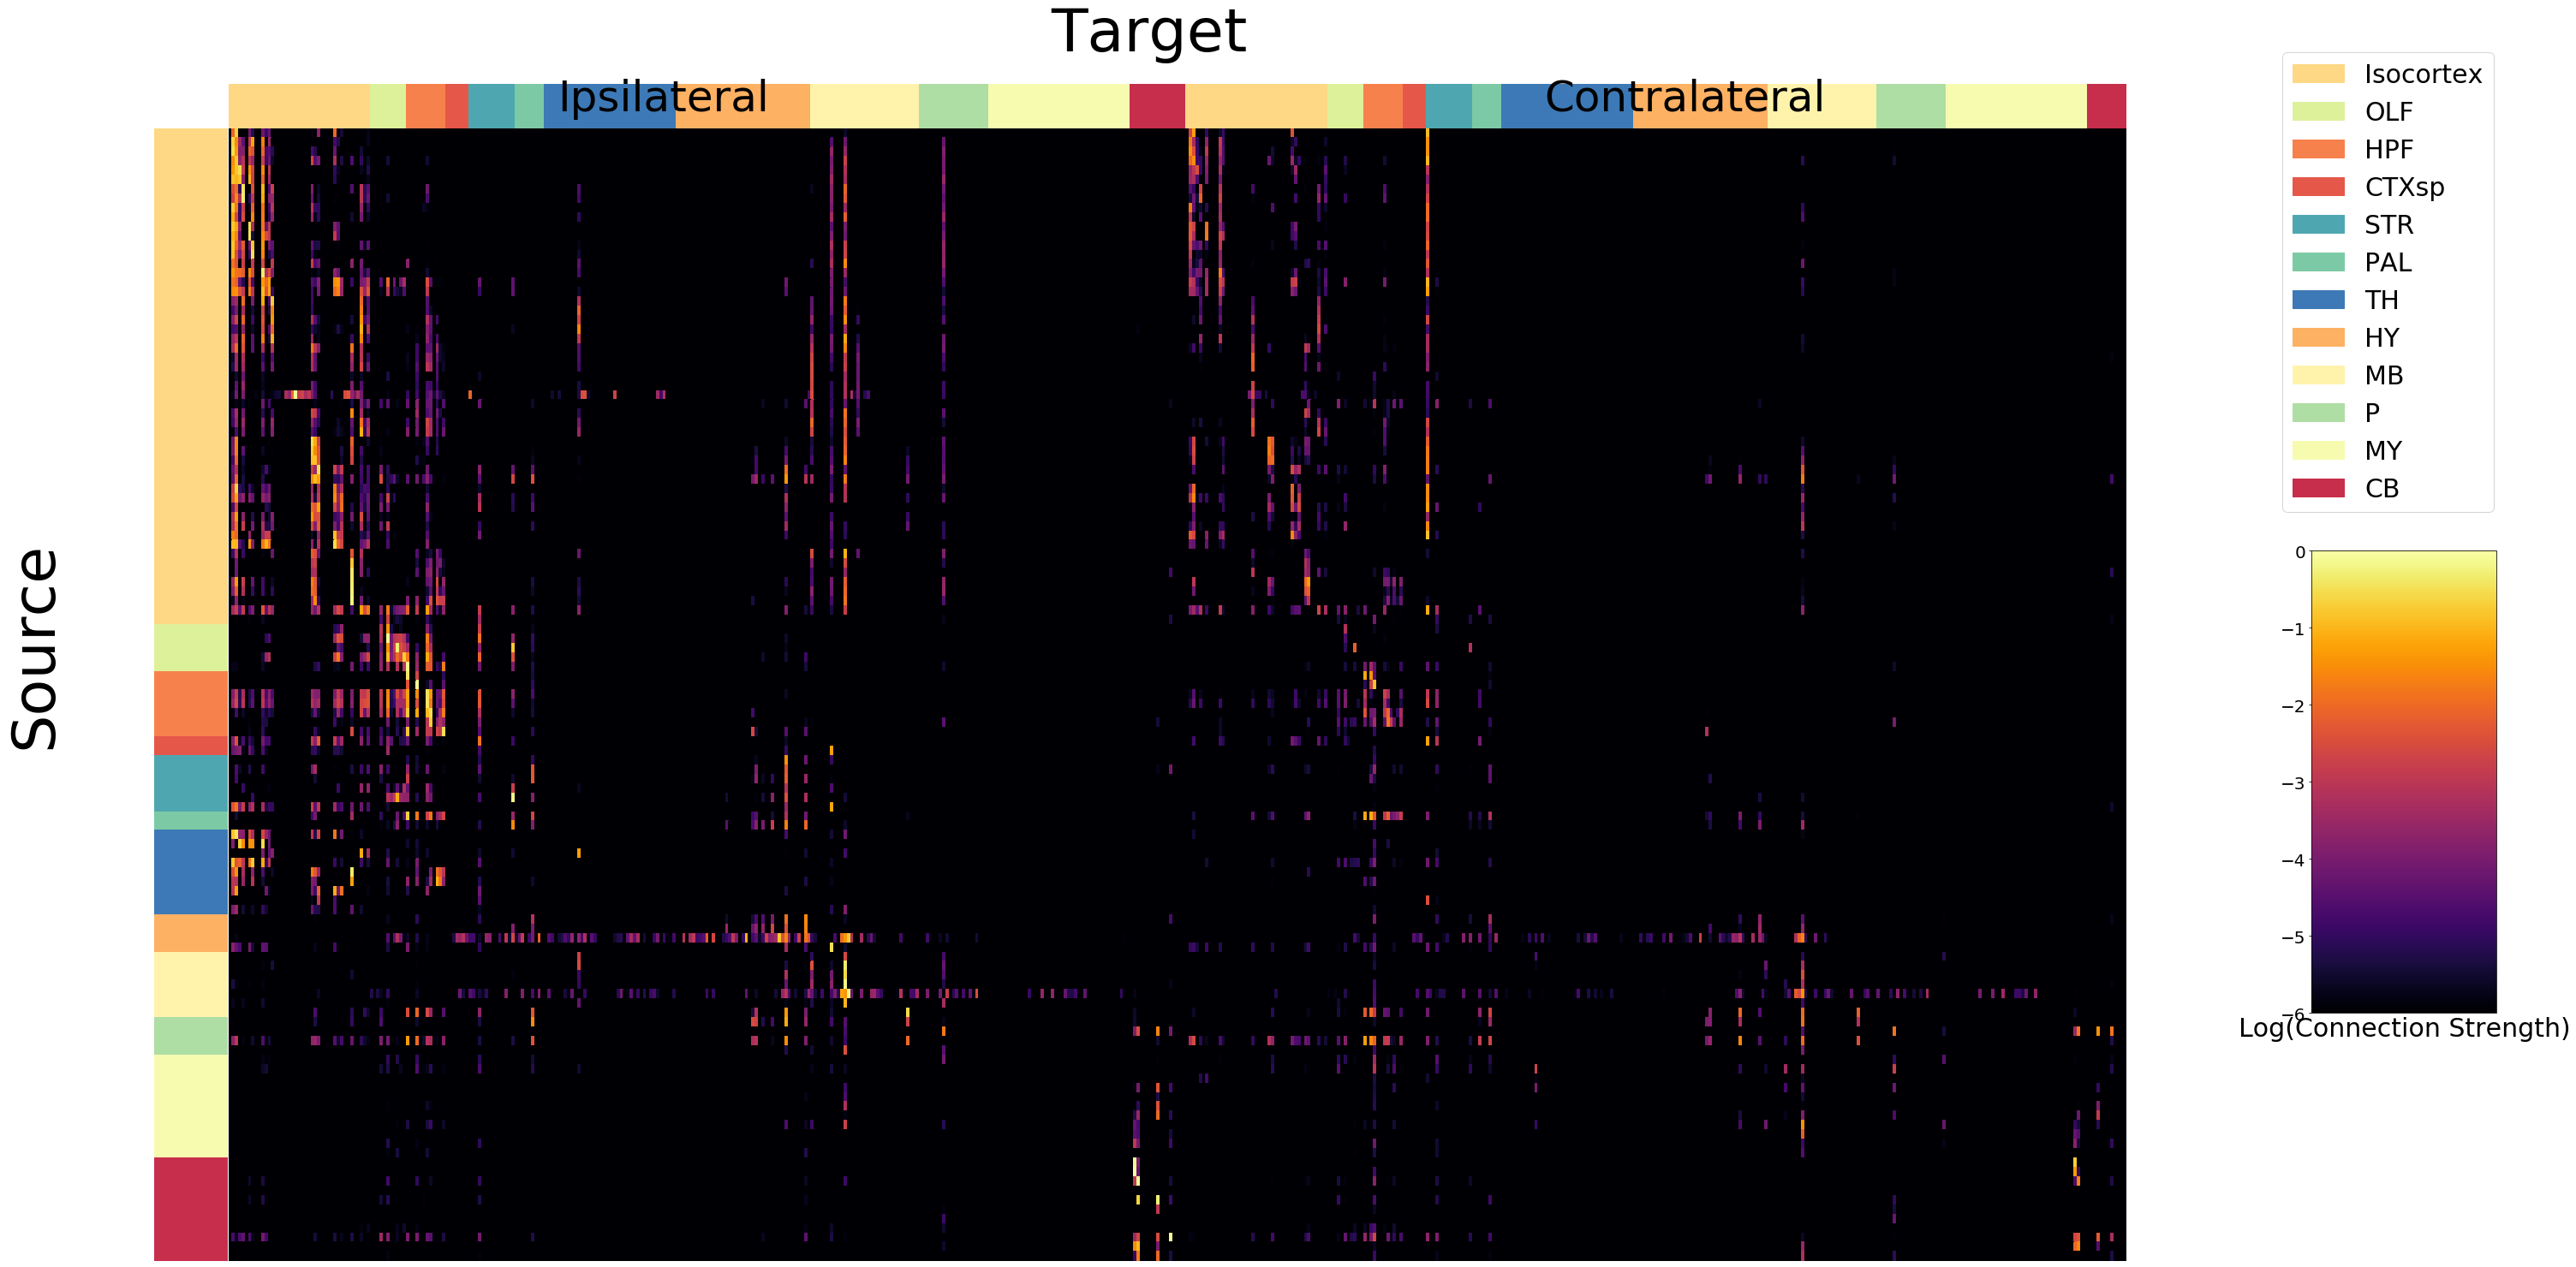

In [51]:
#fig, axes = plt.subplots(2,1,figsize=(5, 3))
#outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
#sns.clustermap(iris)
#cbar_ax = plt.gca()
#sns.clustermap(data, cbar_ax=cbar_ax)
#fig, ax = plt.subplots(figsize = (60,30))

cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (100,25),
                   cmap = mpl.cm.inferno,
                    )

#xticklabels = cm.ax_heatmap.get_xticklabels()
#cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)
cm.ax_heatmap.tick_params(left=False, bottom=False, right = False, top = False)
cm.ax_heatmap.set_xticklabels([])
cm.ax_heatmap.set_yticklabels([])

# yticklabels = cm.ax_heatmap.get_yticklabels()
# cm.ax_heatmap.set_yticklabels(yticklabels, visible = True, fontsize = 5)

cm.ax_row_dendrogram.set_visible(False)
cm.ax_col_dendrogram.set_visible(False)
cm.cax.set_visible(False)
cm.gs.update(left=0.05, right=0.45)
cm.ax_heatmap.set_xlabel('')
cm.ax_heatmap.set_ylabel('')
cm.ax_heatmap.tick_params(left=False, bottom=False)

gs2 = matplotlib.gridspec.GridSpec(1,1, left=0.6)
ax2 = cm.fig.add_axes([.48,.2,.03,.3], gs2[0])
cm.ax_heatmap.legend(loc='lower right',bbox_to_anchor=(1.2,0.65),handles = handles, frameon=True, fontsize = 30)
#cm.ax_heatmap.text(2.,2.,'Ipsilateral', fontsize = 55)
cm.ax_col_colors.text(100.,.6, 'Ipsilateral', fontsize = 50)
cm.ax_col_colors.text(400.,.6, 'Contralateral', fontsize = 50)
#cm.ax_col_colors.text(291.,.6, '|', fontsize = 50)
cm.ax_col_colors.text(250.,-.75, 'Target', fontsize = 70)
cm.ax_row_colors.text(-2.,65., 'Source', fontsize = 70, rotation = 90)

cbar = fig.colorbar(im1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Connectivity strength', rotation=0)
cbar.ax.set_xlabel('Log(Connection Strength)', rotation=0, fontsize = 30)
cbar.ax.yaxis.set_ticks_position('left')

#plt.close(2)
plt.savefig('/Users/samsonkoelle/Desktop/Figure2')

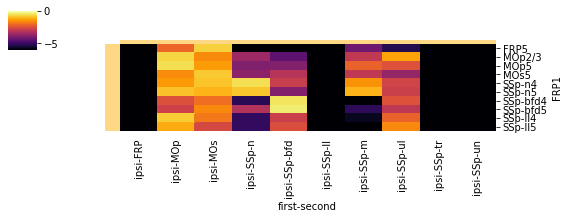

In [44]:

cm = sns.clustermap(wt_conn_nonzero_log.iloc[:10,:10], 
                    vmax= 0, 
                    vmin = -6, 
                    row_colors = crow[:10], 
                    col_colors = ccol[:10], 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (8,3),
                   cmap = mpl.cm.inferno,
                    )

cm.ax_heatmap.tick_params(left=False, bottom=False)

In [24]:
xticklabels = cm.ax_heatmap.get_xticklabels()
cm.ax_heatmap.set_xticklabels(xticklabels, visible = True, fontsize = 5)


In [20]:
cm.ax_heatmap.set_xticklabels('')

Help on method tick_params in module matplotlib.axes._base:

tick_params(axis='both', **kwargs) method of matplotlib.axes._axes.Axes instance
    Change the appearance of ticks, tick labels, and gridlines.
    
    Parameters
    ----------
    axis : {'x', 'y', 'both'}, optional
        Which axis to apply the parameters to.
    
    Other Parameters
    ----------------
    
    axis : {'x', 'y', 'both'}
        Axis on which to operate; default is 'both'.
    
    reset : bool
        If *True*, set all parameters to defaults
        before processing other keyword arguments.  Default is
        *False*.
    
    which : {'major', 'minor', 'both'}
        Default is 'major'; apply arguments to *which* ticks.
    
    direction : {'in', 'out', 'inout'}
        Puts ticks inside the axes, outside the axes, or both.
    
    length : float
        Tick length in points.
    
    width : float
        Tick width in points.
    
    color : color
        Tick color; accepts any mpl color

In [18]:
import matplotlib

In [116]:
# networks = sns.load_dataset("brain_networks", index_col=0, header=[0, 1, 2])
# network_labels = networks.columns.get_level_values("network")
# network_pal = sns.cubehelix_palette(network_labels.unique().size,
#                                     light=.9, dark=.1, reverse=True,
#                                     start=1, rot=-2)
# network_lut = dict(zip(map(str, network_labels.unique()), network_pal))

# network_colors = pd.Series(network_labels).map(network_lut)

# g = sns.clustermap(networks.corr(),

#                   # Turn off the clustering
#                   row_cluster=False, col_cluster=False,

#                   # Add colored class labels
#                   row_colors=network_colors, col_colors=network_colors,

#                   # Make the plot look better when many rows/cols
#                   linewidths=0, xticklabels=False, yticklabels=False)


# for label in network_labels.unique():
#     g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
#                             label=label, linewidth=0)
# g.ax_col_dendrogram.legend(loc="center", ncol=6)

# g.cax.set_position([.15, .2, .03, .45])
# g.savefig("clustermap.png")

In [111]:
network_colors

0     [0.14250609166695374, 0.06696404307500585, 0.1...
1     [0.14250609166695374, 0.06696404307500585, 0.1...
2     [0.16155595934115108, 0.12444369703732092, 0.2...
3     [0.16155595934115108, 0.12444369703732092, 0.2...
4     [0.14490368795926326, 0.2065088491953011, 0.31...
                            ...                        
57    [0.8955408221495149, 0.9180142943633274, 0.833...
58    [0.8955408221495149, 0.9180142943633274, 0.833...
59    [0.8955408221495149, 0.9180142943633274, 0.833...
60    [0.8955408221495149, 0.9180142943633274, 0.833...
61    [0.8955408221495149, 0.9180142943633274, 0.833...
Name: network, Length: 62, dtype: object

In [ ]:
import matplotlib.patches as mpatches
import seaborn as sns

reo = [4,7,2,1,10,9,11,3,5,8,6,0]
handles = [mpatches.Patch(color =  cs_col_ipsi_dict[major_structures[i]], label = major_structures[i]) for i in reo]

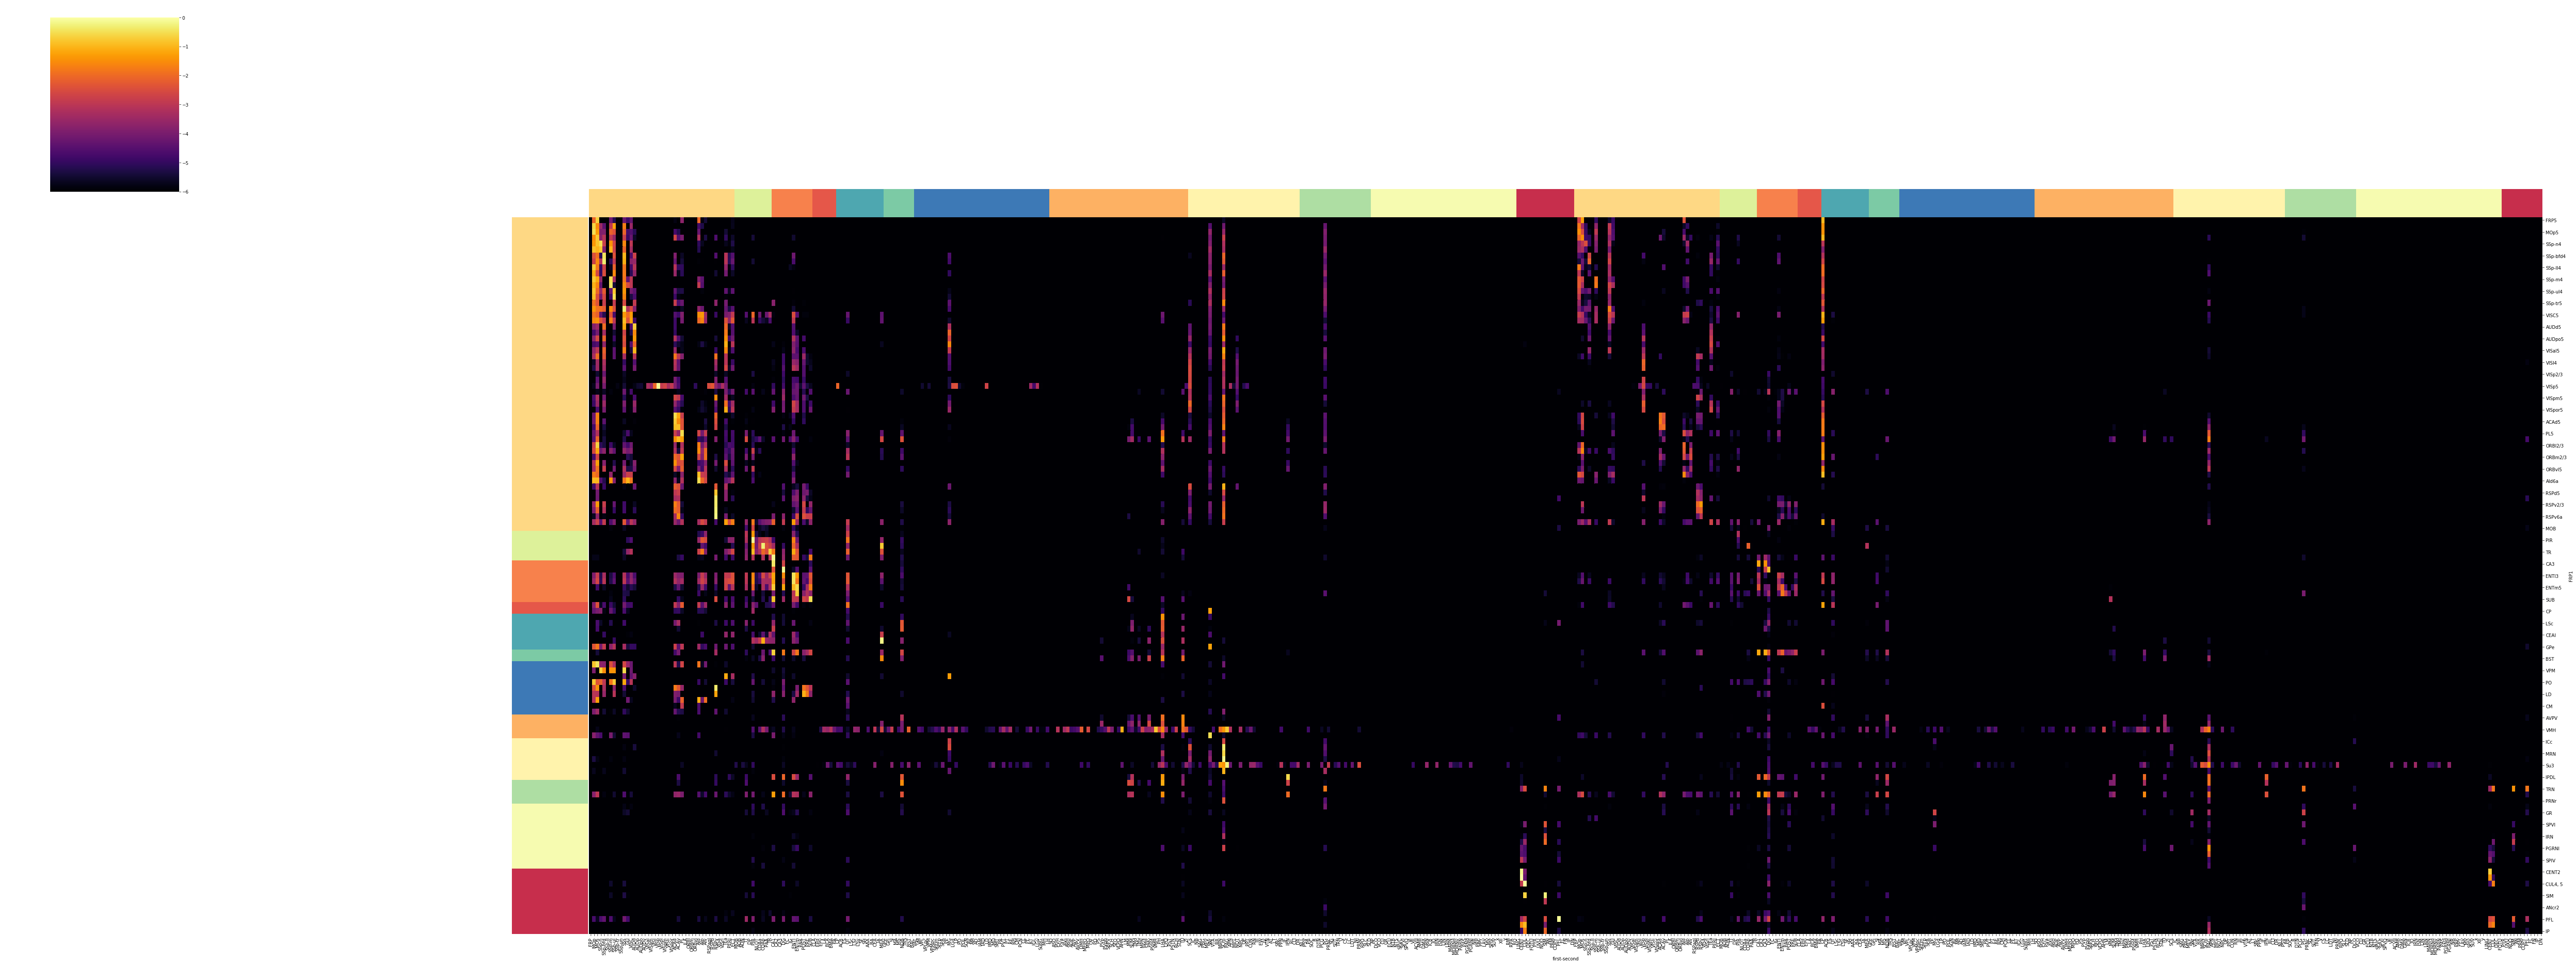

In [50]:
cm = sns.clustermap(wt_conn_nonzero_log, 
                    vmax= 0, 
                    vmin = -6, 
                    xticklabels=xticknames, 
                    row_colors = crow, 
                    col_colors = ccol, 
                    row_cluster=False , 
                    col_cluster = False,
                    figsize = (80,30),
                   cmap = mpl.cm.inferno,
                    )


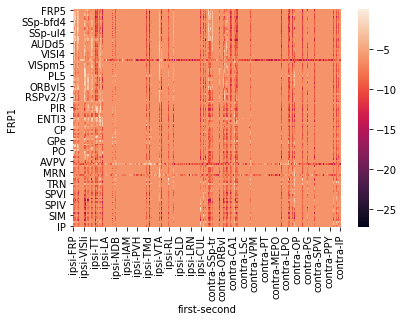

In [38]:
sns.heatmap(wt_conn_nonzero_log)

In [26]:
xticknames = wt_conn.columns.get_level_values('second')

In [30]:
import matplotlib